In [53]:
import jax.numpy as jnp

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Full Kernel

In [54]:
def plot_data(full, sparsification=None):
    dp_1 = jnp.arange(1,50)*10
    dp_2 = jnp.arange(500, 1001, 100)
    dp_3 = jnp.arange(1200, 3000, 200)

    if full:
        t_1 = jnp.load("./data/full_time_10_500_10.npy")
        t_2 = jnp.load("./data/full_time_500_1001_100.npy")
        t_3 = jnp.load("./data/full_time_1200_3000_200.npy")
    else:
        t_1 = jnp.load(f"./data/sparse_time_10_500_10_{sparsification}.npy")
        t_2 = jnp.load(f"./data/sparse_time_500_1001_100_{sparsification}.npy")
        t_3 = jnp.load(f"./data/sparse_time_1200_3000_200_{sparsification}.npy")

    dp = jnp.hstack((dp_1, dp_2, dp_3))
    t = jnp.hstack((t_1, t_2, t_3))

    return dp, t

In [55]:
order = 3

In [56]:
dp_full, t_full = plot_data(True)

lm = LinearRegression()
lm.fit(dp_full.reshape(-1,1), t_full**(1/order))
line_full = lm.predict(dp_full.reshape(-1,1))

print(lm.score(dp_full.reshape(-1,1), t_full**(1/order)))

0.9814514356103423


In [57]:
dp_sparse_list = []
t_sparse_list = []
line_sparse_list = []

sparse_list = [0.05, 0.2, 0.4, 0.6, 0.8]

for sparse in sparse_list:
    dp_sparse, t_sparse = plot_data(False, sparse)
    dp_sparse_list.append(dp_sparse)
    t_sparse_list.append(t_sparse)

    lm = LinearRegression()
    lm.fit(dp_sparse.reshape(-1,1), t_sparse**(1/order))
    line_sparse_list.append(lm.predict(dp_sparse.reshape(-1,1)))

    print(lm.score(dp_sparse.reshape(-1,1), t_sparse**(1/order)))

0.4935011309055374
0.936934571019177
0.9715499041205011
0.9838005423429239
0.9878038656235937


Text(0, 0.5, 'average inversion time')

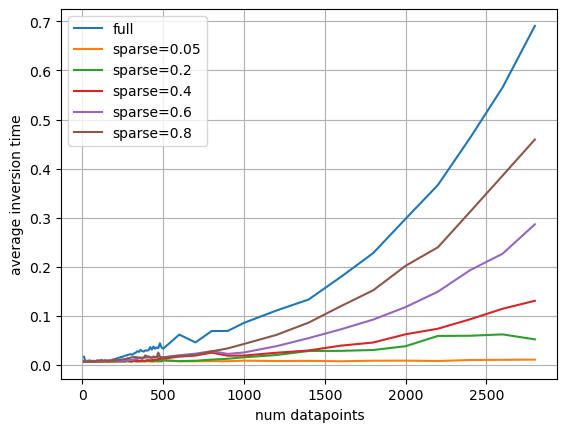

In [58]:
plt.plot(dp_full,t_full, label="full")
# plt.plot(dp_full, line_full**order, label="$\mathcal{O}(n^"+f"{order})$")

for (dp, t, line, sparse) in zip(dp_sparse_list, t_sparse_list, line_sparse_list, sparse_list):
    plt.plot(dp,t, label=f"{sparse=}")
    # plt.plot(dp, line**order, label="$\mathcal{O}(n^"+f"{order})$")

plt.grid()
plt.legend()
plt.xlabel("num datapoints")
plt.ylabel("average inversion time")

Text(0, 0.5, 'average inversion time')

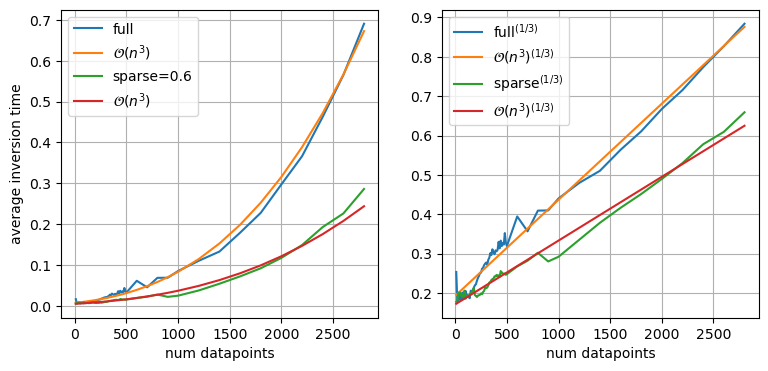

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

dp_sparse = dp_sparse_list[3]
t_sparse = t_sparse_list[3]
line_sparse = line_sparse_list[3]
sparse = sparse_list[3]

ax[0].plot(dp_full,t_full, label="full")
ax[0].plot(dp_full, line_full**order, label="$\mathcal{O}(n^"+f"{order})$")
ax[0].plot(dp_sparse,t_sparse, label=f"{sparse=}")
ax[0].plot(dp_sparse, line_sparse**order, label="$\mathcal{O}(n^"+f"{order})$")

ax[1].plot(dp_full,t_full**(1/order), label="full$^{(1/"+f"{order}"+")}$")
ax[1].plot(dp_full, line_full, label="$\mathcal{O}(n^"+f"{order})"+"^{(1/"+f"{order}"+")}$")
ax[1].plot(dp_sparse,t_sparse**(1/order), label="sparse$^{(1/"+f"{order}"+")}$")
ax[1].plot(dp_sparse, line_sparse, label="$\mathcal{O}(n^"+f"{order})"+"^{(1/"+f"{order}"+")}$")

for i in range(2):
    ax[i].grid()
    ax[i].set_xlabel("num datapoints")
    ax[i].legend()

ax[0].set_ylabel("average inversion time")